# Neural Computation Exercise 1: Linear Regression and Gradient Descent

In this exercise, you will learn the following
* import a data file for further processing with NumPy
* produce scatter and line plots using Matplotlib
* define a linear regression model and a cost function
* fit a linear regression model using ordinary least squares method
* train a linear regression model using gradient descent

To solve the exercise, you need to fill in some [Python](https://docs.python.org/3/tutorial/) code below. Suggested solutions will be posted on Canvas later.

## Reading data from a CSV file

We first read the cat data set from a local comma separated value (CSV) file, and store the body and heart weights in two arrays. 

We will use the two Python packages [NumPy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/). NumPy is an open-source module that provides fast, precompiled numerical routines. To learn more about NumPy, you can [read this short tutorial](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html). Matplotlib is a 2D plotting library which can be used to produce [a wide range of plots](https://matplotlib.org/gallery.html), including histograms, power spectra, bar charts, errorcharts, and scatterplots. To learn more about Maptplotlib, you can [read this short tutorial](https://matplotlib.org/users/pyplot_tutorial.html). 

You should import these packages using the `import` statement. To call a function `X` from the NumPy module, you would normally have to write `NumPy.X()`. However, if you invoke NumPy functions many places in your code, this quickly becomes tedious. By adding `as np` after your `import` statement as shown below, you can instead write  `np.X()`, which is less verbose. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We will use the [genfromtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.genfromtxt.html) function in NumPy to read the data set from a CSV file located at some URL.

    np.genfromtxt(url, delimiter=None, skip_header=0, usecols=None) 

This function takes several arguments, including: 

* `url`: a string that specifies a file name or an URL for the CSV file, 
* `delimiter`: a string used to separate value, 
* `skip_header`: an int indicates the number of lines to skip at the beginning of the file,  
* `usecols`: a sequence indicating which columns to read, with 0 as first column. 
            
We can read data from the file and store them into a variable named `cats` using the following line. You can see that `cats` is a NumPy array with two columns. The first column is the body weight, while the second column is the heart weight.

In [2]:
# Read the data from file
cats = np.genfromtxt("http://www.cs.bham.ac.uk/~lehrepk/nc/cats.csv",delimiter=",", skip_header=1, usecols=(1,2))

# print out the content of cats
cats

array([[ 2. ,  7. ],
       [ 2. ,  7.4],
       [ 2. ,  9.5],
       [ 2.1,  7.2],
       [ 2.1,  7.3],
       [ 2.1,  7.6],
       [ 2.1,  8.1],
       [ 2.1,  8.2],
       [ 2.1,  8.3],
       [ 2.1,  8.5],
       [ 2.1,  8.7],
       [ 2.1,  9.8],
       [ 2.2,  7.1],
       [ 2.2,  8.7],
       [ 2.2,  9.1],
       [ 2.2,  9.7],
       [ 2.2, 10.9],
       [ 2.2, 11. ],
       [ 2.3,  7.3],
       [ 2.3,  7.9],
       [ 2.3,  8.4],
       [ 2.3,  9. ],
       [ 2.3,  9. ],
       [ 2.3,  9.5],
       [ 2.3,  9.6],
       [ 2.3,  9.7],
       [ 2.3, 10.1],
       [ 2.3, 10.1],
       [ 2.3, 10.6],
       [ 2.3, 11.2],
       [ 2.4,  6.3],
       [ 2.4,  8.7],
       [ 2.4,  8.8],
       [ 2.4, 10.2],
       [ 2.5,  9. ],
       [ 2.5, 10.9],
       [ 2.6,  8.7],
       [ 2.6, 10.1],
       [ 2.6, 10.1],
       [ 2.7,  8.5],
       [ 2.7, 10.2],
       [ 2.7, 10.8],
       [ 2.9,  9.9],
       [ 2.9, 10.1],
       [ 2.9, 10.1],
       [ 3. , 10.6],
       [ 3. , 13. ],
       [ 2. ,

Now we are going to use a variable named `body_weight` to store all body weight (the first column in the `cats` array). To do so, we call a function `T` (transpose) to convert two columns into two rows. Each row now can be accessed by specifying the row number inside a square bracket. The following line will extract all data from the first column of the cats array and store them into the variable body_weight. 

In [3]:
# extract body_weight data from cats variable
body_weight = cats.T[0]
body_weight

array([2. , 2. , 2. , 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.2,
       2.2, 2.2, 2.2, 2.2, 2.2, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3,
       2.3, 2.3, 2.3, 2.3, 2.4, 2.4, 2.4, 2.4, 2.5, 2.5, 2.6, 2.6, 2.6,
       2.7, 2.7, 2.7, 2.9, 2.9, 2.9, 3. , 3. , 2. , 2. , 2.1, 2.2, 2.2,
       2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.3, 2.4, 2.4, 2.4, 2.4, 2.4, 2.5,
       2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6,
       2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.8, 2.8, 2.8, 2.8,
       2.8, 2.8, 2.8, 2.9, 2.9, 2.9, 2.9, 2.9, 3. , 3. , 3. , 3. , 3. ,
       3. , 3. , 3. , 3. , 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.2, 3.2, 3.2,
       3.2, 3.2, 3.2, 3.3, 3.3, 3.3, 3.3, 3.3, 3.4, 3.4, 3.4, 3.4, 3.4,
       3.5, 3.5, 3.5, 3.5, 3.5, 3.6, 3.6, 3.6, 3.6, 3.7, 3.8, 3.8, 3.9,
       3.9])

You should now complete the next code block in order to copy the second column in an array `heart_weight`.

In [4]:
# write your code to extract data from second column here
heart_weight = cats.T[1]
heart_weight

array([ 7. ,  7.4,  9.5,  7.2,  7.3,  7.6,  8.1,  8.2,  8.3,  8.5,  8.7,
        9.8,  7.1,  8.7,  9.1,  9.7, 10.9, 11. ,  7.3,  7.9,  8.4,  9. ,
        9. ,  9.5,  9.6,  9.7, 10.1, 10.1, 10.6, 11.2,  6.3,  8.7,  8.8,
       10.2,  9. , 10.9,  8.7, 10.1, 10.1,  8.5, 10.2, 10.8,  9.9, 10.1,
       10.1, 10.6, 13. ,  6.5,  6.5, 10.1,  7.2,  7.6,  7.9,  8.5,  9.1,
        9.6,  9.6, 10.7,  9.6,  7.3,  7.9,  7.9,  9.1,  9.3,  7.9,  8.6,
        8.8,  8.8,  9.3, 11. , 12.7, 12.7,  7.7,  8.3,  9.4,  9.4, 10.5,
       11.5,  8. ,  9. ,  9.6,  9.6,  9.8, 10.4, 11.1, 12. , 12.5,  9.1,
       10. , 10.2, 11.4, 12. , 13.3, 13.5,  9.4, 10.1, 10.6, 11.3, 11.8,
       10. , 10.4, 10.6, 11.6, 12.2, 12.4, 12.7, 13.3, 13.8,  9.9, 11.5,
       12.1, 12.5, 13. , 14.3, 11.6, 11.9, 12.3, 13. , 13.5, 13.6, 11.5,
       12. , 14.1, 14.9, 15.4, 11.2, 12.2, 12.4, 12.8, 14.4, 11.7, 12.9,
       15.6, 15.7, 17.2, 11.8, 13.3, 14.8, 15. , 11. , 14.8, 16.8, 14.4,
       20.5])

## Visualising the data
We will now visualise the relationship between body and heart weights of the cats using a scatter plot using the [`scatter`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html) function in the matplotlib.pylot module. This function can be called as follows:

    plt.scatter( x , y )
    
The two arguments `x` and `y` are the input data. We can label the `x`- and `y`-axes as follows: 

    plt.xlabel("x_label_here")
    plt.ylabel("y_label_here") 
    
The function scatter has many additional arguments, as [described in the reference manual]([`scatter`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html). 

Now, you should make a scatter plot of the heart weight versus body weight. You should label the x- and y-axes by "Body weight (kg)" and "Heart weight (gm)". Hint: Remember to include `plt.show()` at the end; otherwise, the scatter plot is not shown.

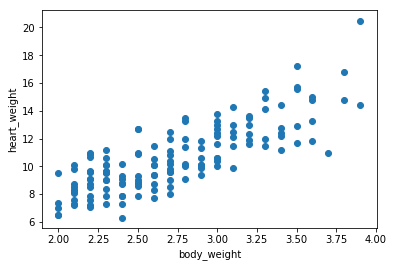

In [5]:
# Insert your code to make the scatter plot here.
plt.scatter(body_weight,heart_weight)
plt.xlabel("body_weight")
plt.ylabel("heart_weight")
plt.show()

## Defining a linear regression model

A linear regression model in one variable has the following form $f(x) = wx+b$, where $x$ is the input, $w$ is called the weight and $b$ is known as the bias. As discussed in the lecture, we simplify the model even more by assuming $b=0$. The model now becomes $f(x)=wx$. If you sketch this model on xy coordinate system, it is a straight line passing through the origin with slope $w$. (i.e. derivative). 

The purpose of generating such a model is to predict an output (cat heart weight) given an input (cat body weight). Given the model parameter $w$ and the new input $x$, the output predicted by our simple model is $wx$. We will define a function named `linearmodel(x,w)` which represents this model. The function takes two arguments, the model parameter $w$ and the input $x$, and it returns the predicted output $wx$. 

A function is a block of organized, reusable code that is used to perform a single, related action. Like Java or C, you can declare your own function in Python. Function blocks usually begin with the keyword def followed by the function name and parentheses. 
Any input parameters or arguments should be placed within these parentheses. You can also define parameters inside these parentheses. A return statement with no arguments (i.e. return;) is the same as return None. 

    def function_name( parameters ):
       return value

Notice that Python programs get structured through indentation, i.e. code blocks are defined by their indentation. This principle makes it easier to read and understand other people's Python code, but sometimes it could cause confusion to some people, especially those who are used to using { } to specify a code blocks, like in Java or C. Note also that Python does not require a semi-colon ; at the end of each statement. 

Now, you should define the function `linearmodel` as described above.

In [6]:
# Insert code to define the linearmodel function here.
def linearmodel(x,w):
    return np.multiply(x,w)

We will visualise the cat data set together with the linear regression model for a given weight parameter $w$. Let's consider the following block of codes.

    w = 3.907111
    x = np.arange(2.0, 4.0, 0.2)
    plt.plot(x, linearmodel(x,w), 'r-')
    plt.show()
    
The first line assigns a value of 3.907111 to the weight $w$. The function call `np.arange(x,y,z)` returns an array of evenly separated values, starting from x to y (excluding) with step size of z. For example, np.arange(3,7,2) yields an array consisting of 3 and 5 only. The `plt.plot()` function call is then invoked to plot the linear model for a given weight. Notice that the data set drawn on the y-axis in this case will be the set of output values received from calling the function `linearmodel(x,w)` once for each element in the array `x`. The argument `'r-'` specifies that we want to plot a solid red line.

Write code to plot this simple linear model for the cats data set. You have to plot the cats data set first (use code from the previous exercise, and remove the `plt.show()` in the end), and then add the code to plot the linear model. Remember to add `plt.show()` in the end, otherwise the plot is not displayed.

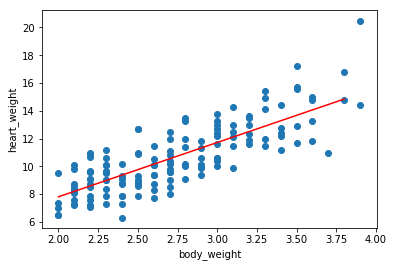

In [7]:
# Add your previous code to plot a scatter here without plt.show() at the end.
plt.scatter(body_weight,heart_weight)
plt.xlabel("body_weight")
plt.ylabel("heart_weight")

# Plot the linear regression model f(x) = x*w here as solid red line (r-) in the interval [2,4).
w = 3.907111
x = np.arange(2.0, 4.0, 0.2)
plt.plot(x, linearmodel(x,w), 'r-')
plt.show()


## Ordinary Least Square solution
As you can see from the lecture notes, we define a cost function as follows.

$$J(w) = \frac{1}{n}{\sum_{i=1}^n}\frac{1}{2}(y^{(i)}-wx^{(i)})^2$$

By solving the equation $J'(w)=0$ for $w$, We obtain the ordinary least square solution

$$w = \frac{\sum_{i=1}^n x^{(i)}y^{(i)}}{\sum_{i=1}^n (x^{(i)})^2}$$

Here in order to calculate the numerator, we have to calculate $n$ products $x^{(i)}y^{(i)}$ (for $i=1,2,...,n$), and then sum them up. We have to do the same number of steps for the denominator. 

Perhaps the most immediate way of computing these expressions in Python would be to use two for-loops. However, by realising that the numerator and denumerator are dot products between two vectors, we can take advantage of NumPy's efficient routines.
The dot product between two vectors $x = (x^{(1)}, x^{(2)},\ldots,x^{(n)})$ and $y=(y^{(1)}, y^{(2)},\ldots,y^{(n)})$ is $x\cdot y = \sum_{i=1}^n x^{(i)}y^{(i)}$. The formula to calculate $w$ above can be now rewritten as 

$$w = \frac{x\cdot y}{x\cdot x}.$$

To compute the dot product between two vectors $x$ and $y$, we can invoke the NumPy function `np.dot(x,y)`. 

Implement a function `ols` which takes two arguments $x$ and $y$, and which returns the value of the weight parameter $w$ according to the formula above.

In [8]:
# define your ols function here
def ols(x,y):
    return np.dot(x,y)/np.dot(x,x)

Now call the function `ols` with the arrays `body_weight` and `heart_weight` as arguments. What is the value of weight $w$ you obtain?

In [9]:
# call the ols function here
ols(body_weight,heart_weight)

3.90711329727375

## Defining a cost function

The following two functions computes the cost function $J(w)$ and its derivative $J'(w)$, defined above using the data set. Here we make use of function np.sum() to perform the summation of two vectors.  

In [10]:
def J(w,x,y):
    return 0.5*(np.sum((y - linearmodel(x,w)))**2)


def J_d(w,x,y):
    return np.dot(x.T, (linearmodel(x,w)-y))

We assign some values to $w$, using a `np.arange(start, stop, step)` function call as follows:

    w = np.arange(2.9,5.0,0.01)
    
The corresponding values of $J(w)$ can be computed using list comprehension as follows. 

    [J(i) for i in w] 
    
In this statement, we call function $J(i)$ for each value $i$ in the list $w$. 
The result of this statement will be a list $[J(w_1), J(w_2),\ldots,J(w_n)]$. In Python, list comprehensions provide a concise way to create lists. Common applications are to make new lists where each element is the result of some operations applied to each member of another sequence or iterable, or to create a subsequence of those elements that satisfy a certain condition. For example, if we want to create a list of squares for integers from 0 to 9, we often write 

    squares = []
    for x in range(10):
        squares.append(x**2)
        
Now with list comprehension, we can obtain the same result with

    squares = [x**2 for x in range(10)]
   
Can you plot the loss function for values of weight $w$ given above? Remember to label the x- and y-axis as "w" and "J(w)", respectively, and include plt.show() at the end. 

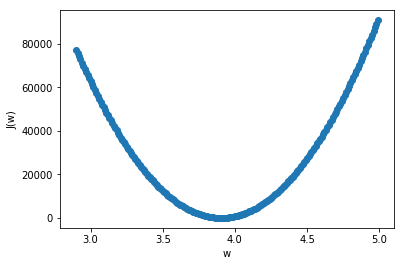

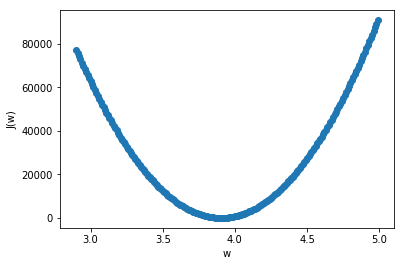

In [11]:
# plot the loss function here
w = np.arange(2.9,5.0,0.01)
J_w = []
for i in w:
    J_w.append(J(i,body_weight,heart_weight))
plt.scatter(w,J_w)
plt.xlabel("w")
plt.ylabel("J(w)")
plt.show()

# or the two lines for loop can be replaced with:

w = np.arange(2.9,5.0,0.01)
plt.scatter(w,[J(i,body_weight,heart_weight) for i in w])
plt.xlabel("w")
plt.ylabel("J(w)")
plt.show()

By looking at the plot you have just drawn, can you roughly estimate for which value of $w$ the loss function has minimum value?

## Gradient Descent in 1D

In this final section, we are going to use the gradient descend method to solve the equation $J'(w)=0$. In gradient descent, we usually work with an update scheme for the weight $w$ using a small rate $\epsilon$. The update rule can be defined as follows.

$$w \leftarrow w - \epsilon\; J'(w)$$

The following (partial) code first sets up a canvas to illustrate visually how gradient descent works on the loss function $J(w)$. Here we use a learning rate $\epsilon = 0.0001$ and initial weight $w_0 = 2.5$. A for-loop will iteratively update the value of weight $w$ (see the body of the for-loop). After each update, the new value of weight $w$ will be plotted, and over time, it shows clearly how the weight is updated until coverging to the global optimum. 

Complete the code below so that the parameter $w$ is updated via gradient descent.

<IPython.core.display.Javascript object>


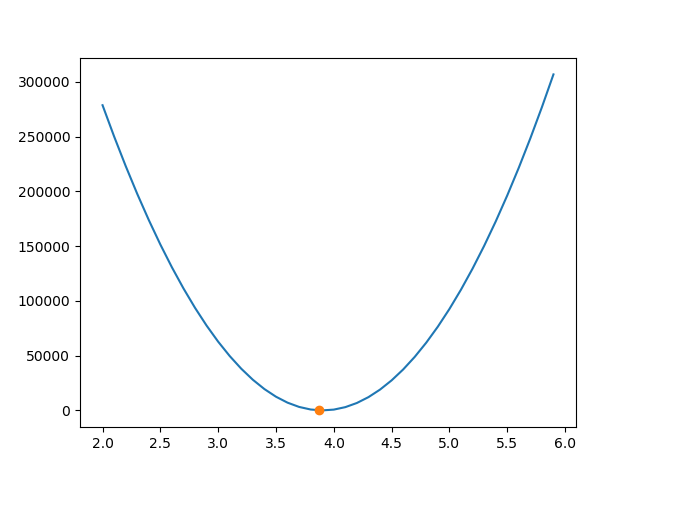

In [ ]:
%matplotlib notebook

import time

# set up the canvas
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

# limit range of values on x-axis
x = np.arange(2,6, 0.1)

# Learning rate
epsilon = 0.0001

# Initial weight
w = 2.5

# update values of w
for i in range(1,100):   
    w = w - epsilon * J_d(w,body_weight,heart_weight)
    ax.clear()
    ax.plot(x,[J(y,body_weight,heart_weight) for y in x])
    ax.plot(w, J(w,body_weight,heart_weight),'o')
    fig.canvas.draw()
    time.sleep(1)
w

For what value of the weight parameter $w$ does the loss function reach its minimum value? 

How is this value different from the weight obtained by using the least-square method? 